In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('ms_data_analyzed.csv')


1. Walking speed analysis:

    -Scatter plot of age vs walking speed with regression line

    -Box plots by education level
    
    -Line plot showing education age interaction

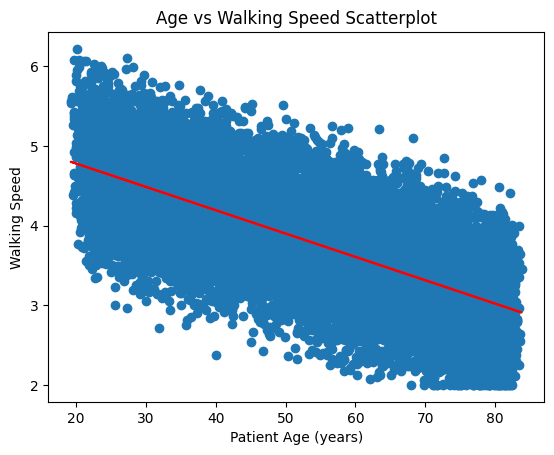

In [8]:
x = df['age']
y = df['walking_speed']

plt.scatter(x,y) #scatter plot

m, b = np.polyfit(x,y,1) #line of fit calculation
plt.plot(x, m*x + b, color='red') #red LOF
plt.title('Age vs Walking Speed Scatterplot')
plt.xlabel('Patient Age (years)')
plt.ylabel('Walking Speed')
plt.savefig('Age_vs_WS_scatter.png')

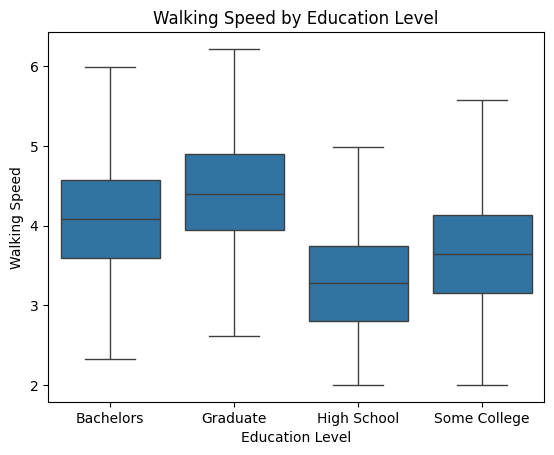

In [9]:
#Boxplot of walking speed by education level
sns.boxplot(x='education_level', y='walking_speed', data = df)
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.title('Walking Speed by Education Level')
plt.savefig('WS_by_Edu_Boxplot.png')

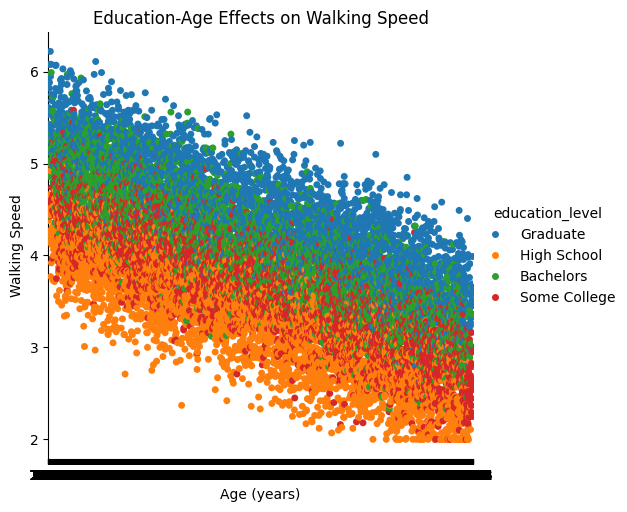

In [10]:
#Education-age interaction on walking speed
sns.catplot(
    data = df, x = 'age', y = 'walking_speed', 
    hue = 'education_level',
    marker = 'o')
plt.title('Education-Age Effects on Walking Speed')
plt.xlabel('Age (years)')
plt.ylabel('Walking Speed')
plt.savefig('Edu_Age_catplot.png')

2. Cost analysis:

    -Bar plot of mean costs by insurance type

    -Box plots showing cost distributions
    
    -Add error bars or confidence intervals


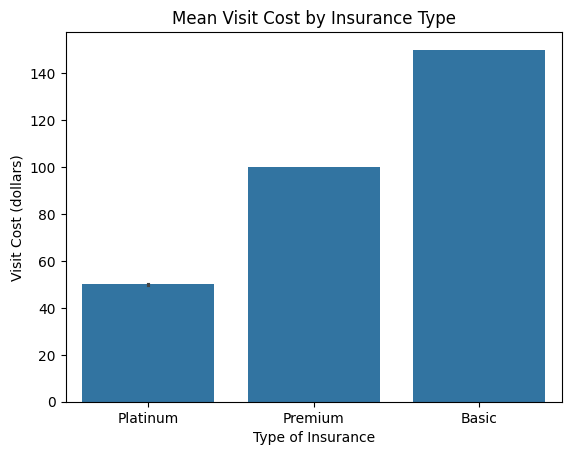

In [11]:
#barplots of mean costs by insurance type
sns.barplot(
    x = 'insurance_type', y = 'visit_cost', 
    data = df,
    errorbar = 'se')
plt.title('Mean Visit Cost by Insurance Type')
plt.xlabel('Type of Insurance')
plt.ylabel('Visit Cost (dollars)')
plt.savefig('Mean_Cost_Insurance.png')

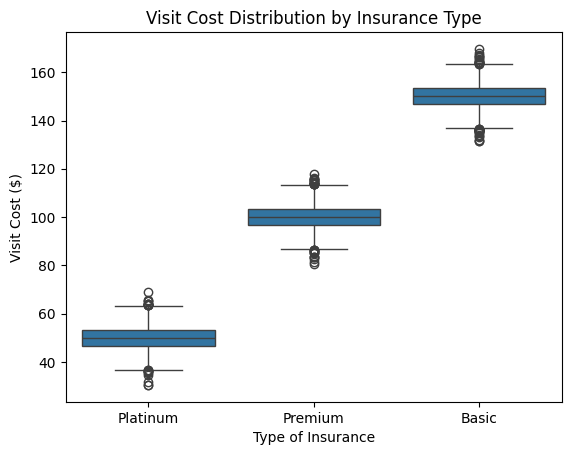

In [12]:
#boxplot showing visit cost distribution
sns.boxplot(
    x = 'insurance_type', y = 'visit_cost', data = df)
plt.title('Visit Cost Distribution by Insurance Type')
plt.xlabel('Type of Insurance')
plt.ylabel('Visit Cost ($)')
plt.savefig('Visit_Cost_Insurance_boxplot.png')

3. Combined visualizations:
   - Pair plot of key variables

   - Faceted plots by education/insurance
   
   - Time trends where relevant

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:

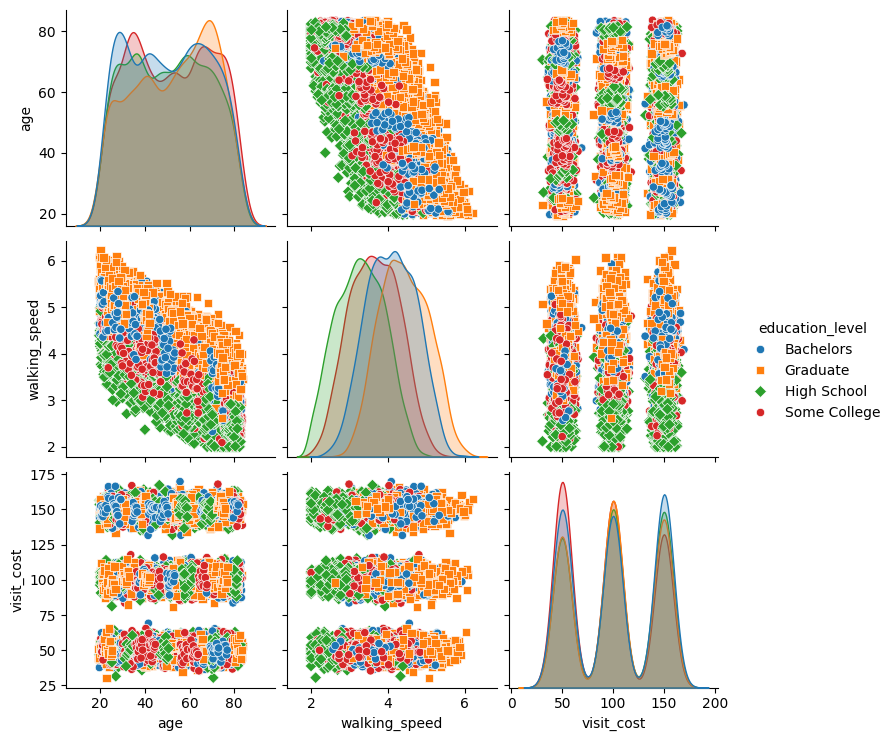

In [16]:
sns.pairplot(df, hue = 'education_level', markers=['o', 's', "D"] )
plt.savefig('pairplot.png')

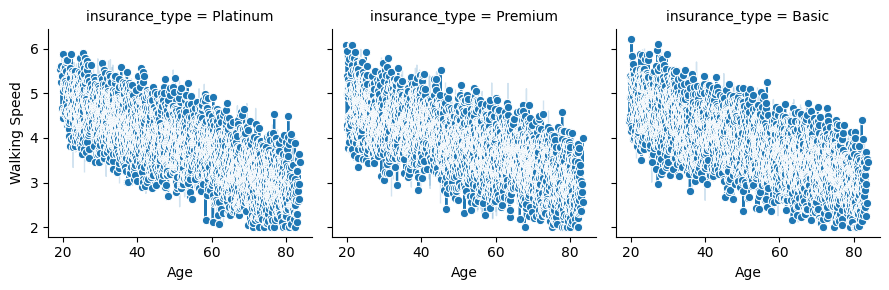

In [17]:
#Faceted plots by insurance type

g = sns.FacetGrid(df, col= 'insurance_type', margin_titles = True)
g.map(sns.lineplot, 'age', 'walking_speed', marker='o')
g.set_axis_labels("Age", "Walking Speed")
g.set_titles("Insurance: {col_name}")
plt.savefig('Insurance_Facet.png')

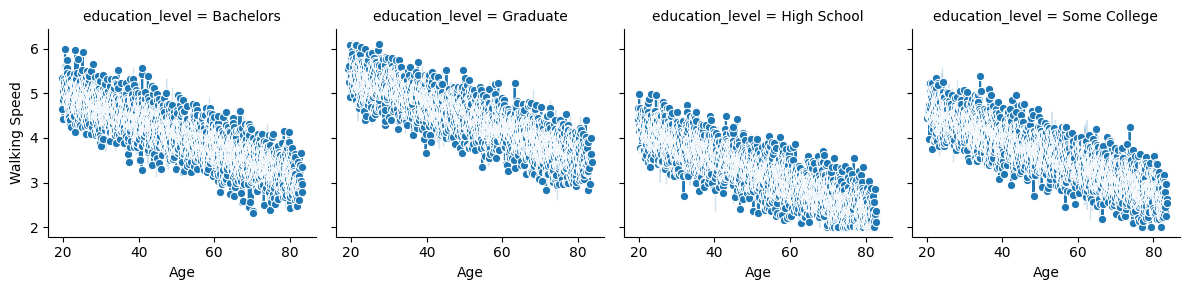

In [18]:
#Faceted plots by Education Level
e = sns.FacetGrid(df, col = 'education_level', margin_titles = True)
e.map(sns.lineplot, 'age', 'walking_speed', marker = 'o')
e.set_axis_labels("Age", 'Walking Speed')
e.set_titles("Education Level: {col_name}")
plt.savefig('Facet_Edu.png')

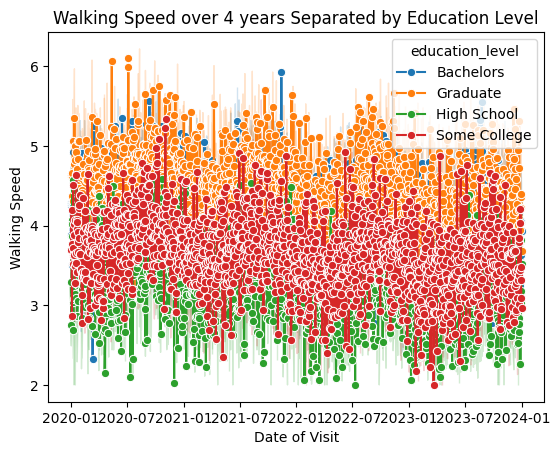

In [19]:
#Time series data
df['visit_date'] = pd.to_datetime(df['visit_date'])
sns.lineplot(
    data = df,
    x = 'visit_date',
    y = 'walking_speed',
    hue = 'education_level',
    marker = 'o'
)
plt.title('Walking Speed over 4 years Separated by Education Level')
plt.xlabel('Date of Visit')
plt.ylabel('Walking Speed')
plt.savefig('WS_Edu_Time.png')